# Importing Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
import warnings
import os

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/BT4012 Project')
os.chdir('Datasets/')

Mounted at /content/drive


In [ ]:
# Import Datasets for Train, Validation and Test
train_vanilla = pd.read_csv('train_vanilla.csv')
train_undersampled = pd.read_csv('train_undersampled.csv')
train_synthetic = pd.read_csv('train_synthetic.csv')

test_df = pd.read_csv('test_data.csv')

# Split Datasets into features and target column
`fraud` is target column for dataset

In [ ]:
train_vanilla.head()

,price_per_occupant,reviews_per_month,review_scores_rating,number_of_reviews,amenities,price,host_total_listings_count,minimum_nights,cancellation_policy,host_response_rate,accommodates,host_total_listings_count_group,beds,bathrooms,property_type,bedrooms,host_identity_verified,fraud
0,-0.606310,0.295724,0.681369,-0.391250,0.470134,0.182401,-0.147658,-0.222934,2,0.282403,1.632424,3,1.368227,-0.449455,0,-0.343801,1,0
1,0.001632,0.873947,0.354150,1.108677,0.071405,-0.362402,-0.327982,-0.122216,1,0.369319,-0.597208,1,-0.619138,-0.449455,0,-0.343801,1,0
2,-0.623680,0.904650,0.572296,-0.057933,1.611167,1.090404,-0.290673,-0.222934,2,0.369319,3.862055,3,5.342957,1.498427,0,2.262622,1,0
3,1.130667,-0.599755,0.463223,-0.002380,-0.530711,1.272005,-0.327982,-0.222934,1,0.369319,-0.039800,1,-0.619138,-0.449455,0,-0.343801,1,0
4,0.081533,-0.737915,-0.300289,-0.280144,-0.433040,0.175137,-0.265801,-0.021499,2,0.108571,-0.039800,3,-0.619138,-0.449455,0,-0.343801,1,1


In [ ]:
X_train_vanilla = train_vanilla.copy().drop(columns='fraud')
Y_train_vanilla = train_vanilla['fraud']

## Split Undersampled Train Dataset

In [ ]:
train_undersampled.head()


,price_per_occupant,reviews_per_month,review_scores_rating,number_of_reviews,amenities,price,host_total_listings_count,minimum_nights,cancellation_policy,host_response_rate,accommodates,host_total_listings_count_group,beds,bathrooms,property_type,bedrooms,host_identity_verified,fraud
0,0.081533,1.641501,0.463223,2.830816,-0.433040,0.175137,-0.240929,-0.021499,2,0.369319,-0.039800,3,-0.619138,-0.449455,0,-0.343801,1,0
1,0.157960,-0.410425,0.681369,-0.530132,-0.318132,1.272005,1.612050,1.690704,1,0.021655,1.075016,3,0.374545,1.498427,0,0.959411,1,0
2,0.856224,-0.563936,0.136003,-0.419026,0.336841,0.233249,-0.203621,-0.122216,1,0.108571,-0.597208,3,-0.619138,-0.449455,0,-1.647013,1,0
3,0.335131,-0.840255,-1.500094,-0.474579,-0.634128,-0.129953,-0.010861,0.381373,2,0.369319,-0.597208,3,-0.619138,-0.449455,0,-1.647013,1,0
4,-0.805020,-0.410425,0.681369,-0.530132,1.633000,-0.405986,1.574742,-0.122216,2,0.369319,1.075016,3,0.374545,1.498427,0,0.959411,1,0


In [ ]:
X_train_undersampled = train_undersampled.copy().drop(columns='fraud')
Y_train_undersampled = train_undersampled['fraud']

## Split Synthetic Train Dataset

In [ ]:
train_synthetic.head()

,price_per_occupant,reviews_per_month,review_scores_rating,number_of_reviews,amenities,price,host_total_listings_count,minimum_nights,cancellation_policy,host_response_rate,accommodates,host_total_listings_count_group,beds,bathrooms,property_type,bedrooms,host_identity_verified,fraud
0,-0.606310,0.295724,0.681369,-0.391250,0.470134,0.182401,-0.147658,-0.222934,2,0.282403,1.632424,3,1.368227,-0.449455,0,-0.343801,1,0
1,0.001632,0.873947,0.354150,1.108677,0.071405,-0.362402,-0.327982,-0.122216,1,0.369319,-0.597208,1,-0.619138,-0.449455,0,-0.343801,1,0
2,-0.623680,0.904650,0.572296,-0.057933,1.611167,1.090404,-0.290673,-0.222934,2,0.369319,3.862055,3,5.342957,1.498427,0,2.262622,1,0
3,1.130667,-0.599755,0.463223,-0.002380,-0.530711,1.272005,-0.327982,-0.222934,1,0.369319,-0.039800,1,-0.619138,-0.449455,0,-0.343801,1,0
4,0.081533,-0.737915,-0.300289,-0.280144,-0.433040,0.175137,-0.265801,-0.021499,2,0.108571,-0.039800,3,-0.619138,-0.449455,0,-0.343801,1,1


In [ ]:
X_train_synthetic = train_synthetic.copy().drop(columns='fraud')
Y_train_synthetic = train_synthetic['fraud']

## Splitting Test Set

In [ ]:
test_df.head()

,price_per_occupant,reviews_per_month,review_scores_rating,number_of_reviews,amenities,price,host_total_listings_count,minimum_nights,cancellation_policy,host_response_rate,accommodates,host_total_listings_count_group,beds,bathrooms,property_type,bedrooms,host_identity_verified,fraud
0,-0.581992,-0.323436,0.681369,-0.169039,-0.120491,-0.769187,-0.327982,-0.021499,2,0.369319,-0.597208,1,-0.619138,-0.449455,0,-0.343801,1,0
1,-0.258915,-0.062468,0.354150,-0.307921,-1.119039,-0.544002,-0.327982,-0.122216,1,0.369319,-0.597208,1,-0.619138,-0.449455,4,-0.343801,0,0
2,0.783271,-0.410425,0.681369,-0.530132,1.237717,1.635207,-0.147658,-0.222934,2,0.282403,0.517608,3,0.374545,-0.449455,0,-0.343801,1,0
3,-0.571571,0.244554,0.136003,-0.196815,1.715733,-0.761923,-0.321764,-0.222934,1,-0.934420,-0.597208,2,-0.619138,-0.449455,0,-0.343801,0,0
4,-0.910281,-0.113638,-0.627509,0.053173,1.660577,-0.180801,-0.327982,-0.021499,0,0.369319,2.747240,1,3.355592,-0.449455,8,2.262622,1,1


In [ ]:
X_test = test_df.copy().drop(columns='fraud')
Y_test = test_df['fraud']

#Random Forest Classifier
Random Forest reduces overfitting by averaging multiple decision trees and is less sensitive to noise and outliers in the data. It provides a measure of feature importance, which can be useful for feature selection and data interpretation.

## Fitting Random Forest Classifer on Train Sets
### Train Sets: Vanilla, Undersampled, Synthetic

In [ ]:
# Fit Random Forest on Vanilla
rf_vanilla = RandomForestClassifier(random_state=42)
rf_vanilla.fit(X_train_vanilla.values, Y_train_vanilla)

RandomForestClassifier(random_state=42)

In [ ]:
# Fit Random Forest on Undersampled
rf_undersampled = RandomForestClassifier(random_state=42)
rf_undersampled.fit(X_train_undersampled.values, Y_train_undersampled)

RandomForestClassifier(random_state=42)

In [ ]:
# Fit Random Forest on Synthetic
rf_synthetic = RandomForestClassifier(random_state=42)
rf_synthetic.fit(X_train_synthetic.values, Y_train_synthetic)

RandomForestClassifier(random_state=42)

## Cross-validation using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 150, 250],
    'max_depth': [1, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

### Vanilla Train Set Random Forest

In [ ]:
vanilla_grid_search = GridSearchCV(rf_vanilla, param_grid, cv=5, scoring='accuracy', verbose=1)

vanilla_grid_search.fit(X_train_vanilla, Y_train_vanilla)

vanilla_best_params = vanilla_grid_search.best_params_
print(f"Best Hyperparameters: {vanilla_best_params}")

vanilla_best_score = vanilla_grid_search.best_score_
print(f"Best Accuracy Score: {vanilla_best_score}")

rf_tuned_vanilla = vanilla_grid_search.best_estimator_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 250}
Best Accuracy Score: 0.855694818660159


### Undersampled Train Set Random Forest

In [ ]:
undersampled_grid_search = GridSearchCV(rf_undersampled, param_grid, cv=5, scoring='accuracy', verbose=1)

undersampled_grid_search.fit(X_train_undersampled, Y_train_undersampled)

undersampled_best_params = undersampled_grid_search.best_params_
print(f"Best Hyperparameters: {undersampled_best_params}")

undersampled_best_score = undersampled_grid_search.best_score_
print(f"Best Accuracy Score: {undersampled_best_score}")

rf_tuned_undersampled = undersampled_grid_search.best_estimator_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 250}
Best Accuracy Score: 0.8029106029106028


### Synthetic Train Set Random Forest

In [ ]:
synthetic_grid_search = GridSearchCV(rf_synthetic, param_grid, cv=5, scoring='accuracy', verbose=1)

synthetic_grid_search.fit(X_train_synthetic, Y_train_synthetic)

synthetic_best_params = synthetic_grid_search.best_params_
print(f"Best Hyperparameters: {synthetic_best_params}")

synthetic_best_score = synthetic_grid_search.best_score_
print(f"Best Accuracy Score: {synthetic_best_score}")

rf_tuned_synthetic = synthetic_grid_search.best_estimator_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}
Best Accuracy Score: 0.8814246681621156


## Predict on Test set
Predict on test set based on ADABoost classifier with tuned hyperparameters determined by GridSearchCV.

### Vanilla Trained

In [ ]:
pred_vanilla = rf_tuned_vanilla.predict(X_test)

vanilla_cf = confusion_matrix(Y_test, pred_vanilla)
print(f"Confusion Matrix for Random Forest trained on Vanilla: \n{vanilla_cf}")

vanilla_acc = accuracy_score(Y_test, pred_vanilla)
print(f"Accuracy Score for Random Forest trained on Vanilla = {vanilla_acc*100:.2f}%")

vanilla_pre = precision_score(Y_test, pred_vanilla)
print(f"Precision Score for Random Forest trained on Vanilla = {vanilla_pre*100:.2f}%")

vanilla_rec = recall_score(Y_test, pred_vanilla)
print(f"Recall Score for Random Forest trained on Vanilla = {vanilla_rec*100:.2f}%")

vanilla_f1 = f1_score(Y_test, pred_vanilla)
print(f"F1 Score for Random Forest trained on Vanilla = {vanilla_f1*100:.2f}%")

vanilla_roc_auc = roc_auc_score(Y_test, pred_vanilla)
print(f"ROC AUC Score for Random Forest trained on Vanilla = {vanilla_roc_auc*100:.2f}%")

Confusion Matrix for Random Forest trained on Vanilla: 
[[638  36]
 [113 101]]
Accuracy Score for Random Forest trained on Vanilla = 83.22%
Precision Score for Random Forest trained on Vanilla = 73.72%
Recall Score for Random Forest trained on Vanilla = 47.20%
F1 Score for Random Forest trained on Vanilla = 57.55%
ROC AUC Score for Random Forest trained on Vanilla = 70.93%


### Undersampled Trained

In [ ]:
pred_undersampled = rf_tuned_undersampled.predict(X_test)

undersampled_cf = confusion_matrix(Y_test, pred_undersampled)
print(f"Confusion Matrix for Random Forest trained on Undersampled: \n{undersampled_cf}")

undersampled_acc = accuracy_score(Y_test, pred_undersampled)
print(f"Accuracy Score for Random Forest trained on Undersampled = {undersampled_acc*100:.2f}%")

undersampled_pre = precision_score(Y_test, pred_undersampled)
print(f"Precision Score for Random Forest trained on Undersampled = {undersampled_pre*100:.2f}%")

undersampled_rec = recall_score(Y_test, pred_undersampled)
print(f"Recall Score for Random Forest trained on Undersampled = {undersampled_rec*100:.2f}%")

undersampled_f1 = f1_score(Y_test, pred_undersampled)
print(f"F1 Score for Random Forest trained on Undersampled = {undersampled_f1*100:.2f}%")

undersampled_roc_auc = roc_auc_score(Y_test, pred_undersampled)
print(f"ROC AUC Score for Random Forest trained on Undersampled = {undersampled_roc_auc*100:.2f}%")


Confusion Matrix for Random Forest trained on Undersampled: 
[[538 136]
 [ 24 190]]
Accuracy Score for Random Forest trained on Undersampled = 81.98%
Precision Score for Random Forest trained on Undersampled = 58.28%
Recall Score for Random Forest trained on Undersampled = 88.79%
F1 Score for Random Forest trained on Undersampled = 70.37%
ROC AUC Score for Random Forest trained on Undersampled = 84.30%


### Synthetic Trained

In [ ]:
pred_synthetic = rf_tuned_synthetic.predict(X_test)

synthetic_cf = confusion_matrix(Y_test, pred_synthetic)
print(f"Confusion Matrix for Random Forest trained on Synthetic: \n{synthetic_cf}")

synthetic_acc = accuracy_score(Y_test, pred_synthetic)
print(f"Accuracy Score for Random Forest trained on Synthetic = {synthetic_acc*100:.2f}%")

synthetic_pre = precision_score(Y_test, pred_synthetic)
print(f"Precision Score for Random Forest trained on Synthetic = {synthetic_pre*100:.2f}%")

synthetic_rec = recall_score(Y_test, pred_synthetic)
print(f"Recall Score for Random Forest trained on Synthetic = {synthetic_rec*100:.2f}%")

synthetic_f1 = f1_score(Y_test, pred_synthetic)
print(f"F1 Score for Random Forest trained on Synthetic = {synthetic_f1*100:.2f}%")

synthetic_roc_auc = roc_auc_score(Y_test, pred_synthetic)
print(f"ROC AUC Score for Random Forest trained on Synthetic = {synthetic_roc_auc*100:.2f}%")

Confusion Matrix for Random Forest trained on Synthetic: 
[[587  87]
 [ 51 163]]
Accuracy Score for Random Forest trained on Synthetic = 84.46%
Precision Score for Random Forest trained on Synthetic = 65.20%
Recall Score for Random Forest trained on Synthetic = 76.17%
F1 Score for Random Forest trained on Synthetic = 70.26%
ROC AUC Score for Random Forest trained on Synthetic = 81.63%


## Plots to show Performance

### Precision-Recall Curve

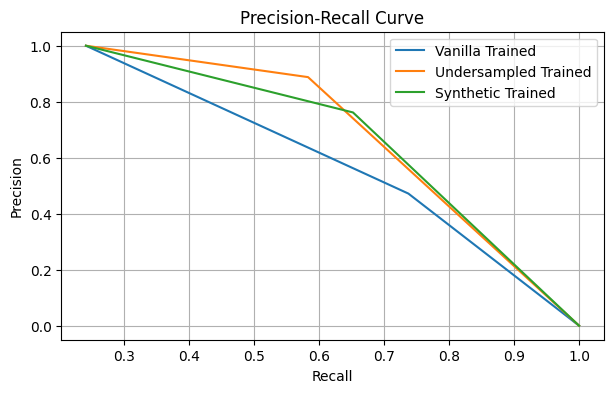

In [ ]:
vanilla_prerec_curve = precision_recall_curve(Y_test, pred_vanilla)
undersampled_prerec_curve = precision_recall_curve(Y_test, pred_undersampled)
synthetic_prerec_curve = precision_recall_curve(Y_test, pred_synthetic)

plt.figure(figsize=(7,4))
plt.plot(vanilla_prerec_curve[0], vanilla_prerec_curve[1], label='Vanilla Trained')
plt.plot(undersampled_prerec_curve[0], undersampled_prerec_curve[1], label='Undersampled Trained')
plt.plot(synthetic_prerec_curve[0], synthetic_prerec_curve[1], label='Synthetic Trained')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

### ROC AUC

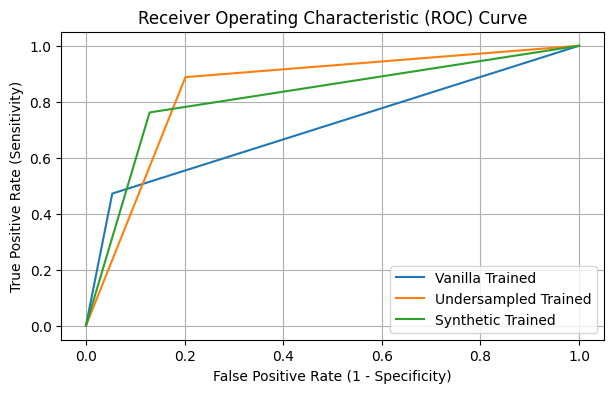

In [ ]:
vanilla_roc_curve = roc_curve(Y_test, pred_vanilla)
undersampled_roc_curve = roc_curve(Y_test, pred_undersampled)
synthetic_roc_curve = roc_curve(Y_test, pred_synthetic)

plt.figure(figsize=(7,4))
plt.plot(vanilla_roc_curve[0], vanilla_roc_curve[1], label='Vanilla Trained')
plt.plot(undersampled_roc_curve[0], undersampled_roc_curve[1], label='Undersampled Trained')
plt.plot(synthetic_roc_curve[0], synthetic_roc_curve[1], label='Synthetic Trained')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()